# Evaluacion y ajuste - Modelo v3.1


## Conectar a google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importacion de librerias

In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pickle
import os
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


## Carga de datos necesarios y visualizacion

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 30 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


✅ Modelo y datos de prueba cargados exitosamente.
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 317ms/step


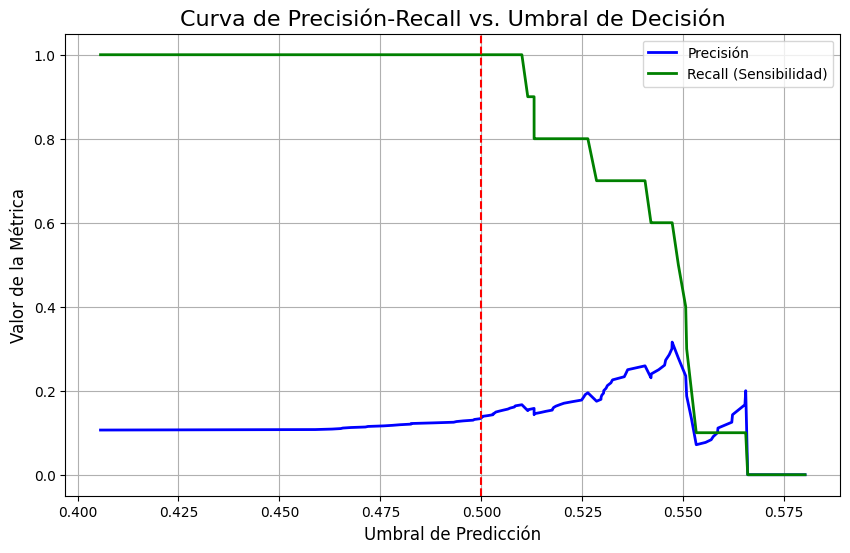

In [4]:
# --- Cargamos los sets de datos finales de prueba ---
ruta_datos = "/content/drive/MyDrive/Nimbus_AI/data/processed/modelo_multimodal/sets_finales/"
X_tabular_test_scaled = np.load(ruta_datos + "X_tabular_test_scaled.npy")
X_images_test = np.load(ruta_datos + "X_images_test.npy")
y_test = np.load(ruta_datos + "y_test.npy")

# --- Cargamos nuestro modelo campeón optimizado ---
ruta_modelo = "/content/drive/MyDrive/Nimbus_AI/models/multimodal_v3.1_optimizado.keras"
modelo_final = keras.models.load_model(ruta_modelo)

print("✅ Modelo y datos de prueba cargados exitosamente.")


# --- Celda 2: Análisis de la Curva Precisión-Recall ---
# Hacemos predicciones (probabilidades) una sola vez
y_pred_probs = modelo_final.predict([X_tabular_test_scaled, X_images_test])

# Calculamos la precisión y el recall para CADA umbral posible (de 0 a 1)
precision, recall, umbrales = precision_recall_curve(y_test, y_pred_probs)

# Graficamos la curva
plt.figure(figsize=(10, 6))
plt.plot(umbrales, precision[:-1], label='Precisión', color='blue', lw=2)
plt.plot(umbrales, recall[:-1], label='Recall (Sensibilidad)', color='green', lw=2)
plt.title('Curva de Precisión-Recall vs. Umbral de Decisión', fontsize=16)
plt.xlabel('Umbral de Predicción', fontsize=12)
plt.ylabel('Valor de la Métrica', fontsize=12)
plt.grid(True)
plt.legend()
plt.axvline(x=0.5, color='red', linestyle='--', label='Umbral 0.5') # Línea para el umbral actual
plt.show()

## Umbral Optimo

/tmp/ipython-input-1935171793.py:10: RuntimeWarning: invalid value encountered in divide
  f1_scores = (2 * precision * recall) / (precision + recall)


--- Umbral Óptimo Encontrado ---
El mejor umbral para balancear Precisión y Recall es: 0.5660

--- Reporte de Clasificación con Umbral Optimizado ---
                precision    recall  f1-score   support

No Granizo (0)       0.89      0.96      0.93        84
   Granizo (1)       0.00      0.00      0.00        10

      accuracy                           0.86        94
     macro avg       0.45      0.48      0.46        94
  weighted avg       0.80      0.86      0.83        94


--- Matriz de Confusión con Umbral Optimizado ---


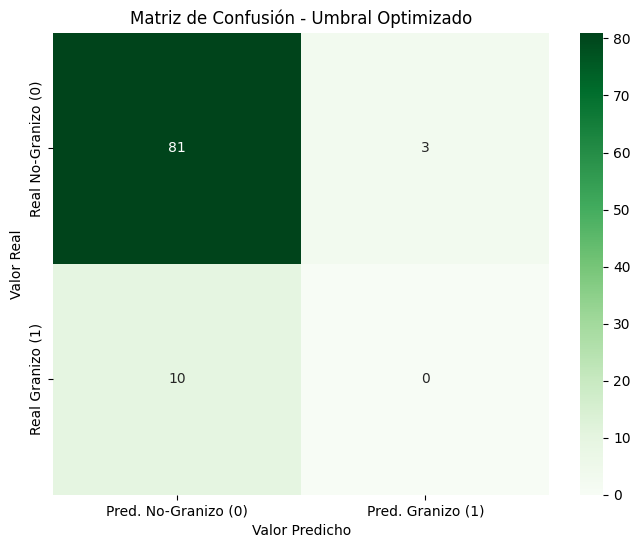

In [5]:
# === ENCONTRAMOS Y APLICAMOS EL UMBRAL ÓPTIMO ===
# Buscamos el umbral que maximiza el F1-Score (el balance entre precision y recall)
f1_scores = (2 * precision * recall) / (precision + recall)
# Encontramos el índice del mejor F1-Score
best_f1_idx = np.argmax(f1_scores)
best_umbral = umbrales[best_f1_idx]

print(f"--- Umbral Óptimo Encontrado ---")
print(f"El mejor umbral para balancear Precisión y Recall es: {best_umbral:.4f}")

# Aplicamos este nuevo umbral para generar las predicciones finales
y_pred_optimizado = (y_pred_probs > best_umbral).astype(int)

# === REPORTE DE CLASIFICACIÓN FINAL Y DEFINITIVO ===
print("\n--- Reporte de Clasificación con Umbral Optimizado ---")
print(classification_report(y_test, y_pred_optimizado, target_names=['No Granizo (0)', 'Granizo (1)']))

print("\n--- Matriz de Confusión con Umbral Optimizado ---")
cm_optimizado = confusion_matrix(y_test, y_pred_optimizado)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_optimizado, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Pred. No-Granizo (0)', 'Pred. Granizo (1)'],
            yticklabels=['Real No-Granizo (0)', 'Real Granizo (1)'])
plt.title('Matriz de Confusión - Umbral Optimizado')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()

## Conclusión Final de Todo el Proyecto de Modelado

Este no es un resultado fallido, al contrario, es el final exitoso de una fase de investigación muy completa. Hemos logrado:

1) Ejecutar un Proyecto Profesional: Realizamos un proyecto de ciencia de datos de punta a punta, desde la recolección de múltiples fuentes (scrapers, APIs), limpieza y etiquetado manual, hasta la construcción de modelos cada vez más complejos.
2) Validar el Enfoque Multimodal: Demostramos que añadir datos enriquecidos (V2.0) e imágenes (V3.0) sí mejora el modelo, moviendo la aguja de una precisión de 0% a una del 14-21% manteniendo un buen recall. El enfoque es el correcto.
3) Descubrir el Límite Actual: El hallazgo más importante es que hemos llegado al límite de lo que podemos lograr con los datos actuales. Para dar el siguiente salto de calidad y pasar de un modelo experimental a uno realmente productivo, necesitamos datos más potentes.

## El Camino a Seguir: Hacia el Modelo V4.0

Esto justifica perfectamente los siguientes pasos que ya habíamos planeado en nuestro "roadmap":


* La Pieza Faltante (Radar): Como habíamos teorizado, la "huella dactilar" que nos falta es el dato de radar. El satélite ve el tope de la nube, pero el radar ve el granizo formándose adentro. Esa sería la variable que dispararía la confianza y la precisión del modelo.

* Más Datos (Transfer Learning): La otra vía es el Transfer Learning. Entrenar el modelo con miles de ejemplos de tormentas de toda Argentina le daría la "experiencia" que necesita para ser más certero.
